**NYC Leading Causes of Death: Diabetes Disparities by Sex and Race/Ethnicity**

**Introduction and Motivation**

The goal of this project is to explore disparities in diabetes-related mortality in New York City. Diabetes is a chronic condition that disproportionately affects certain demographic groups and is closely connected to broader public health and equity issues.


I chose this topic because of my background in nonprofit and community health work and my interest in understanding how health outcomes differ across sex and race/ethnicity in NYC.

**Research Question**

Do diabetes-related deaths differ by sex and race/ethnicity in New York City, and how do these differences appear over time?

**Data Source**

The dataset used in this analysis comes from NYC Open Data and was published by the New York City Department of Health and Mental Hygiene (DOHMH). The dataset is publicly available and contains official mortality records for New York City residents.


The dataset includes 2,102 rows and 7 columns covering the years 2007 through 2021.

**Verifying Dataset File**

Before loading the dataset, I verified that the CSV file exists in the Google Colab environment. I used the `ls` command to list the files in the current working directory and confirm that the dataset was uploaded correctly.

In [53]:
ls

'NYC LCOD Cleaned Dataset.csv'   sample_data/


**Importing Libraries**

I imported the pandas library, which is a Python library used for data manipulation and analysis. Pandas allows me to load the dataset into a DataFrame and perform operations like filtering, grouping, and calculating statistics.

**Loading the Dataset**

I used the `read_csv` function from pandas to load the dataset into a DataFrame called `df`. This converts the CSV file into a structured table that can be analyzed using Python.

In [54]:
import pandas as pd
df = pd.read_csv('NYC LCOD Cleaned Dataset.csv')

**Previewing the Data**

I displayed the first five rows of the dataset to confirm that the data loaded correctly and to get an initial understanding of the columns and values.

In [55]:
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2021,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Not Stated/Unknown,190.0,NaN,NaN
1,2021,Alzheimer's Disease (G30),Female,Not Stated/Unknown,7.0,NaN,NaN
2,2021,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Not Stated/Unknown,113.0,NaN,NaN
3,2021,Malignant Neoplasms (Cancer: C00-C97),Male,Not Stated/Unknown,84.0,NaN,NaN
4,2021,Cerebrovascular Disease (Stroke: I60-I69),Male,Other Race/ Ethnicity,11.0,NaN,NaN


**Dataset Size and Structure**

I checked the shape and column names of the dataset to understand how many rows and columns it contains and to verify the names of each variable.

In [56]:
df.shape, df.columns

((2102, 7),
 Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
        'Death Rate', 'Age Adjusted Death Rate'],
       dtype='object'))

**Data Types and Missing Values**

I used `df.info()` to examine the data types of each column and identify missing values. This step helps determine what data cleaning or transformations are needed before analysis.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2102 non-null   int64  
 1   Leading Cause            2102 non-null   object 
 2   Sex                      2102 non-null   object 
 3   Race Ethnicity           2102 non-null   object 
 4   Deaths                   1964 non-null   float64
 5   Death Rate               1373 non-null   float64
 6   Age Adjusted Death Rate  1373 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 115.1+ KB


**Data Cleaning**

Some records in the dataset are missing values for Age Adjusted Death Rate. Because this variable is necessary for fair comparisons across demographic groups, I removed rows where this value is missing.

In [58]:
df_clean = df.dropna(subset=['Age Adjusted Death Rate'])
df_clean.shape

(1373, 7)

**Filter to Diabetes Records**

To answer the research question, I filtered the dataset to include only records where the leading cause of death relates to diabetes.

In [59]:
diabetes_df = df_clean[df_clean['Leading Cause'].str.contains('Diabetes', case=False, na=False)]
diabetes_df['Leading Cause'].value_counts()

,count
Leading Cause,
Diabetes Mellitus (E10-E14),123


**Standardizing Sex Categories**

Before calculating descriptive statistics, I identified inconsistencies in the Sex column. The dataset contained multiple representations for the same categories (e.g., "F" and "Female", "M" and "Male"). To ensure accurate grouping and comparison, I standardized these values into two consistent categories: "Female" and "Male".

In [60]:
diabetes_df = diabetes_df.copy()
diabetes_df["Sex"] = diabetes_df["Sex"].replace({"F":"Female","M":"Male"})

**Descriptive Statistics**

I calculated descriptive statistics for age-adjusted diabetes death rates grouped by sex and race/ethnicity to compare differences across demographic groups.

In [61]:
diabetes_df.groupby(['Sex', 'Race Ethnicity'])['Age Adjusted Death Rate'].describe()

count       mean       std        min  \
Sex    Race Ethnicity                                                      
Female Asian and Pacific Islander   15.0  10.621774  1.239943   8.300000   
       Black Non-Hispanic            8.0  33.337500  1.001338  31.600000   
       Hispanic                     15.0  18.561538  3.166617  12.600000   
       Non-Hispanic Black            7.0  29.475588  3.094089  24.300000   
       Non-Hispanic White            6.0   8.485077  1.024663   7.485000   
       Not Stated/Unknown            2.0  20.348975  1.936023  18.980000   
       White Non-Hispanic            8.0  10.125000  0.781482   8.800000   
Male   Asian and Pacific Islander   15.0  15.480637  2.402377  11.961792   
       Black Non-Hispanic            8.0  41.350000  1.760682  38.100000   
       Hispanic                     15.0  26.121792  2.432845  20.700000   
       Non-Hispanic Black            7.0  41.785477  4.045576  33.700000   
       Non-Hispanic White            7.0  15.381618  1.363789  13.951702   
       Not Stated/Unknown            2.0  61.809605  5.209403  58.126000   
       White Non-Hispanic            8.0  16.662500  1.293873  15.000000   

                                         25%        50%        75%        max  
Sex    Race Ethnicity                                                          
Female Asian and Pacific Islander   9.944346  11.100000  11.350000  12.700000  
       Black Non-Hispanic          32.875000  33.400000  33.925000  34.700000  
       Hispanic                    16.910477  18.500000  20.550000  24.100000  
       Non-Hispanic Black          28.236006  29.887000  30.635052  34.400000  
       Non-Hispanic White           8.045667   8.174210   8.521483  10.436985  
       Not Stated/Unknown          19.664487  20.348975  21.033462  21.717949  
       White Non-Hispanic           9.725000  10.150000  10.575000  11.100000  
Male   Asian and Pacific Islander  13.897174  14.900000  16.612747  21.100000  
       Black Non-Hispanic          40.800000  41.250000  42.375000  43.900000  
       Hispanic                    25.404672  25.756160  27.400000  31.300000  
       Non-Hispanic Black          40.651945  43.077000  44.747250  44.922951  
       Non-Hispanic White          14.640164  15.005519  15.651890  18.130000  
       Not Stated/Unknown          59.967802  61.809605  63.651407  65.493209  
       White Non-Hispanic          15.600000  16.350000  18.100000  18.200000

**Visualization**

This visualization compares the average age-adjusted diabetes death rate across sex groups to highlight differences in diabetes-related mortality.

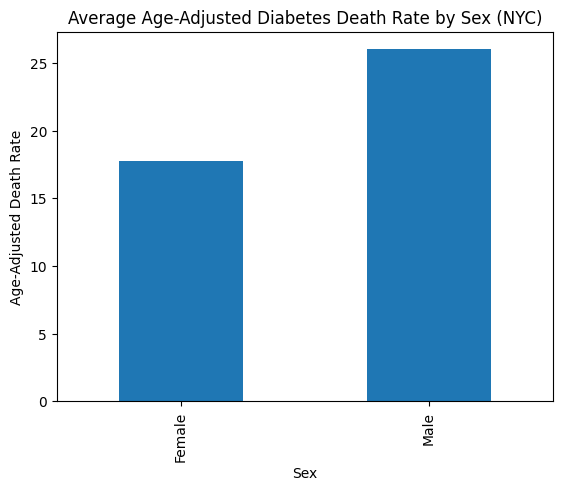

In [62]:
import matplotlib.pyplot as plt

diabetes_df.groupby('Sex')['Age Adjusted Death Rate'].mean().plot(kind='bar')
plt.title('Average Age-Adjusted Diabetes Death Rate by Sex (NYC)')
plt.ylabel('Age-Adjusted Death Rate')
plt.xlabel('Sex')
plt.show()

**Conclusion**

Diabetes-related mortality in New York City shows differences by sex and race/ethnicity based on age-adjusted death rates. These patterns highlight persistent public health disparities and suggest the need for targeted prevention and intervention efforts for higher-burden groups.